# Python Excercise

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# figure size, dpi and font size
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 14

## Problem-1 

- Numerical Calculation of gradient of a function and its comparison with analytical gradient

$$ f(x) = 12.069x_1^2 + 21.504x_2^2 - 1.7321x_1 - x_2 $$

In [2]:
# Class to calculate the gradient of a function

class Gradient:

    """
    Class to calculate the gradient of a function

    Parameters
    ----------
    func : function
        Function to calculate the gradient of
    epsilon : float
        Step size for the finite difference approximation

    Attributes
    ----------
    func : function
        Function to calculate the gradient of
    epsilon : float
        Step size for the finite difference approximation

    Methods
    -------
    forward_diff(x)
        Calculates the gradient of func using the forward difference approximation

    backward_diff(x)
        Calculates the gradient of func using the backward difference approximation

    central_diff(x)
        Calculates the gradient of func using the central difference approximation
        
    """
    
    def __init__(self, func, epsilon=1e-4):
        """
        Parameters
        ----------
        func : function
            Function to calculate the gradient of

        epsilon : float
            Step size for the finite difference approximation
            
            """
        self.func = func
        self.epsilon = epsilon

    def forward_diff(self, x):
        """
        Calculates the gradient of func using the forward difference approximation

        Parameters
        ----------
        x : numpy array
            Point to calculate the gradient at

        Returns
        -------
        numpy array
            Gradient of func at x
        """
        import numpy as np

        # changing the dtype to float64
        x = x.astype(np.float64)

        grad = np.zeros_like(x)
        for i in range(len(x)):
            # .copy() is used to avoid changing the original x
            forward_x = x.copy()

            # forward_x is a point that is h to the right of x
            forward_x[i] += self.epsilon

            # calculating the gradient using the forward difference approximation
            grad[i] = (self.func(forward_x) - self.func(x))/self.epsilon
        return grad

    def backward_diff(self, x):
        
        """
        Calculates the gradient of func using the backward difference approximation

        Parameters
        ----------
        x : numpy array
            Point to calculate the gradient at

        Returns
        -------
        numpy array
            Gradient of func at x
        """

        import numpy as np

        # changing the dtype to float64
        x = x.astype(np.float64)

        grad = np.zeros_like(x)
        for i in range(len(x)):
            # .copy() is used to avoid changing the original x
            backward_x = x.copy()

            # backward_x is a point that is h to the left of x
            backward_x[i] -= self.epsilon

            # calculating the gradient using the backward difference approximation
            grad[i] = (self.func(x) - self.func(backward_x))/self.epsilon
        return grad


    def central_diff(self, x):
        """
        Calculates the gradient of func using the central difference approximation

        Parameters
        ----------
        x : numpy array
            Point to calculate the gradient at

        Returns
        -------
        numpy array
            Gradient of func at x
        """

        import numpy as np

        # changing the dtype to float64
        x = x.astype(np.float64)

        grad = np.zeros_like(x)

        for i in range(len(x)):

            # .copy() is used to avoid changing the original x
            backward_x = x.copy()

            # backward_x is a point that is h/2 to the left of x
            backward_x[i] -= self.epsilon/2

            forward_x = x.copy()
            # forward_x is a point that is h/2 to the right of x
            forward_x[i] += self.epsilon/2

            # calculating the gradient using the central difference approximation
            grad[i] = (self.func(forward_x) - self.func(backward_x))/self.epsilon
        return grad

    


    

In [3]:
def prob1(x):
    """
    Function to calculate the gradient of

    Parameters
    ----------
    x : numpy array
        Point to calculate the gradient at

    Returns
    -------
    float
        Value of the function at x

    """

    return 12.069*(x[0]**2) + 21.504*(x[1]**2) - 1.7321*x[0] -x[1]

    

In [4]:
# Create an instance of the Gradient class
grad = Gradient(prob1, epsilon=1e-4)

# Calculate the gradient at x0
x0 = np.array([5, 6])

# Print the gradient calculated using the forward, backward and central difference approximations
print("gradient calculated for epsilon = 1e-4")
print()
print("The gradient calculated using the forward difference approximation is: ", grad.forward_diff(x0))
print("The gradient calculated using the backward difference approximation is: ", grad.backward_diff(x0))
print("The gradient calculated using the central difference approximation is: ", grad.central_diff(x0))

gradient calculated for epsilon = 1e-4

The gradient calculated using the forward difference approximation is:  [118.9591069 257.0501504]
The gradient calculated using the backward difference approximation is:  [118.9566931 257.0458496]
The gradient calculated using the central difference approximation is:  [118.9579 257.048 ]


***

### Analytical Solution of Problem-1

- Analytical gradient of Problem-1 is given by

$$ f(x) = 12.069x_1^2 + 21.504x_2^2 - 1.7321x_1 - x_2 $$

- Gradient at

$$x = \begin{bmatrix} 5. \\ 6. \end{bmatrix} $$

$$ \nabla f(x) = \begin{bmatrix} \frac{\partial f(x)}{\partial x_1} \\ \frac{\partial f(x)}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 24.138x_1 - 1.7321 \\ 43.008x_2 - 1 \end{bmatrix} $$


***

$$ \nabla f(x) = \begin{bmatrix} 24.138(5) - 1.7321 \\ 43.008(6) - 1 \end{bmatrix} = \begin{bmatrix} 120.69 - 1.7321 \\ 258.048 - 1 \end{bmatrix} $$
$$= \begin{bmatrix} 118.9579 \\ 257.048 \end{bmatrix} $$

- Calculating the error in Problem 1 for the forward difference approximation for different values of $\epsilon$

In [5]:
# Functtion to calculate the error of the gradient calculated using different approximations

def error(x0, epsilon_values, correct_grad, func, method="forward_diff"):
    """
    Calculates the error of the gradient calculated using different approximations

    Parameters
    ----------
    x0 : numpy array
        Point to calculate the gradient at
    epsilon_values : numpy array
        Values of epsilon to calculate the gradient at
    method : str
        Method to calculate the gradient
    correct_grad : numpy array
        Correct gradient of the function
    func : function
        Function to calculate the gradient of

    Returns
    -------
    numpy array
        Error of the gradient calculated using different approximations
    """
    import numpy as np

    # list to store the error
    error_array = []


    

    for epsilon in epsilon_values:
        
        # Create an instance of the Gradient class
        grad = Gradient(func, epsilon=epsilon)


        # calculate the gradient at x0 using the method specified
        grad_x0 = getattr(grad, method)(x0)

        
        # calculate the error for each parttial derivative of the gradient
        error = grad_x0 - correct_grad 
        

        # append the error to the list for plotting
        error_array.append( error)

    return np.array(error_array)



In [6]:
correct_grad = np.array([118.9579, 257.048 ])

# x0 is declared above, so we don't need to declare it again

# epsilon_values is an array of values of epsilon
epsilon_values = np.logspace(-10, -1, 100)

# calculate the error of the gradient calculated using different approximations
forward_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="forward_diff",func=prob1)
backward_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="backward_diff",func=prob1)
central_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="central_diff",func=prob1)

In [7]:
def plot_error(epsilon_values, partial, **errors):
    """
    Plots the error of the gradient calculated using different approximations

    Parameters
    ----------
    epsilon_values : numpy array
        Values of epsilon to calculate the gradient at
    errors : dict
        Error of the gradient calculated using different approximations
    method : str
        Method to calculate the gradient

    Returns
    -------
    None.

    """

    for method, error in errors.items():
        if partial=="x_1":
            plt.plot(epsilon_values, error[:, 0], label=method)
            title_temp = "Error in $\partial f(x)/\partial x_1$ "
        elif partial=="x_2":
            plt.plot(epsilon_values, error[:, 1], label=method)
            title_temp =  "Error in $\partial f(x)/\partial x_2$ "
        else:
            plt.plot(epsilon_values, error[:, 0], label=method+" x1")
            plt.plot(epsilon_values, error[:, 1], label=method+" x2")

    plt.xscale("log") 
    plt.title(title_temp)  
    plt.xlabel("epsilon")
    plt.ylabel("error")
    plt.legend()
    # return the figure, to save it if needed
    return plt
    


    

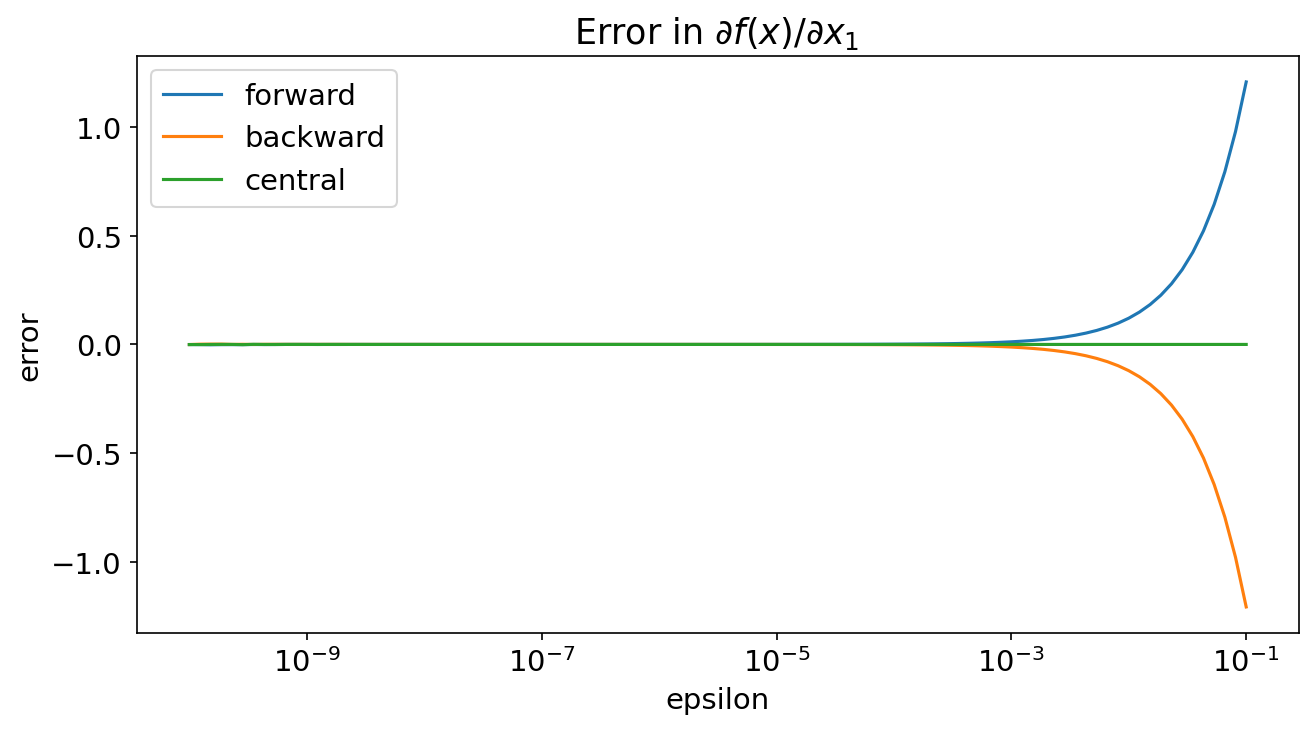

In [8]:
fig = plot_error(epsilon_values=epsilon_values, partial="x_1", forward=forward_err, backward=backward_err, central=central_err)
fig.savefig("figures/1_Problem-1_error_in_grad(x1).png", dpi=300)

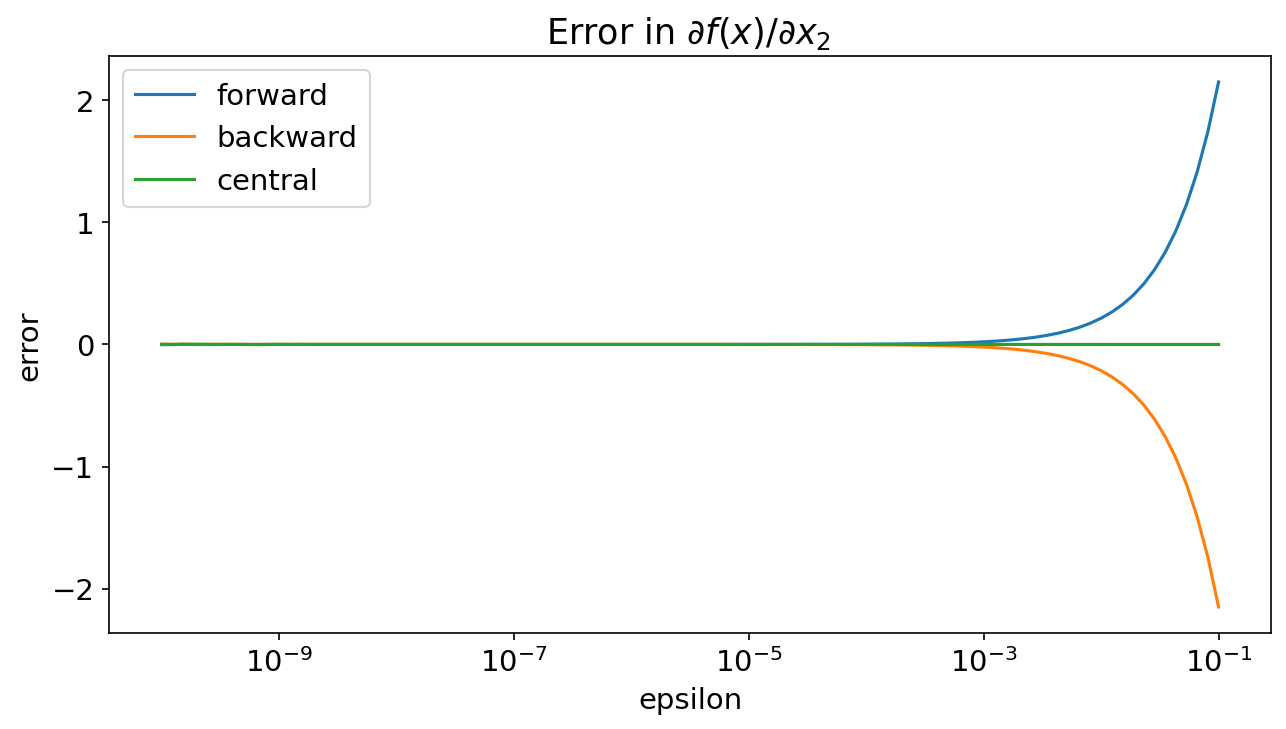

In [9]:
fig = plot_error(epsilon_values=epsilon_values, partial="x_2", forward=forward_err, backward=backward_err, central=central_err)
fig.savefig("figures/2_Problem-1_error_in_grad(x2).png", dpi=300)

- Here we can see that as we increases the value of $\epsilon$ the error also increases

***
***

## Problem-2



$$ f(x) = \frac{ 4x_2^2 - x_1x_2 }{10000(x_2x_1^3 - x_1^4)} $$
$$ at \ x = \begin{bmatrix} 0.5 \\ 1.5 \end{bmatrix} $$

***

### Analytical Solution of Problem-2

- Analytical gradient of Problem-2 is given by

$$ f(x) = \frac{ 4x_2^2 - x_1x_2 }{1000(x_2x_1 - x_1^4)} $$
$$ \nabla f(x) = \begin{bmatrix} \frac{\partial f(x)}{\partial x_1} \\ \frac{\partial f(x)}{\partial x_2} \end{bmatrix} = \begin{bmatrix} \frac{ -3x_2(x_1^2 - 6x_1x_2 +4x_2^2) }{10000x_1^4(x_1 - x_2)^2} \\ \frac{4x_2^2 - 8x_1x_2 + x_1^2}{10000x_1(x_1 - x_2)^2} \end{bmatrix}  $$

$$ = \begin{bmatrix} \frac{ -3(1.5)(0.5^2 - 6(0.5)(1.5) +4(1.5)^2) }{10000(0.5)^4(0.5 - 1.5)^2} \\ \frac{4(1.5)^2 - 8(0.5)(1.5) + (0.5)^2}{10000(0.5)(0.5 - 1.5)^2} \end{bmatrix} $$


$$ = \begin{bmatrix} −0.0342 \\ 0.0026 \end{bmatrix} $$

In [10]:
def prob2(x):
    """
    Function to calculate the gradient of

    Parameters
    ----------
    x : numpy array
        Point to calculate the gradient at

    Returns
    -------
    float
        Value of the function at x

    """

    return (4*x[1]**2 - x[0]*x[1])/(10000*(x[1]*x[0]**3 - x[0]**4))

In [11]:
# Create an instance of the Gradient class
grad2 = Gradient(prob2, epsilon=1e-4)

# Calculate the gradient at x0
x0 = np.array([0.5, 1.5])

# Print the gradient calculated using the forward, backward and central difference approximations
print("gradient calculated for epsilon = 1e-4")
print()
print("The gradient calculated using the Forward Difference approximation is: ", grad2.forward_diff(x0))
print("The gradient calculated using the Backward Difference approximation is: ", grad2.backward_diff(x0))
print("The gradient calculated using the Central Difference approximation is: ", grad2.central_diff(x0))

gradient calculated for epsilon = 1e-4

The gradient calculated using the Forward Difference approximation is:  [-0.03418686  0.00260006]
The gradient calculated using the Backward Difference approximation is:  [-0.03421314  0.00259994]
The gradient calculated using the Central Difference approximation is:  [-0.0342  0.0026]


In [12]:
correct_grad = np.array([-0.0342, 0.0026 ])


epsilon_values = np.logspace(-10, -1, 100)
forward_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="forward_diff",func=prob2)
backward_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="backward_diff",func=prob2)
central_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="central_diff",func=prob2)

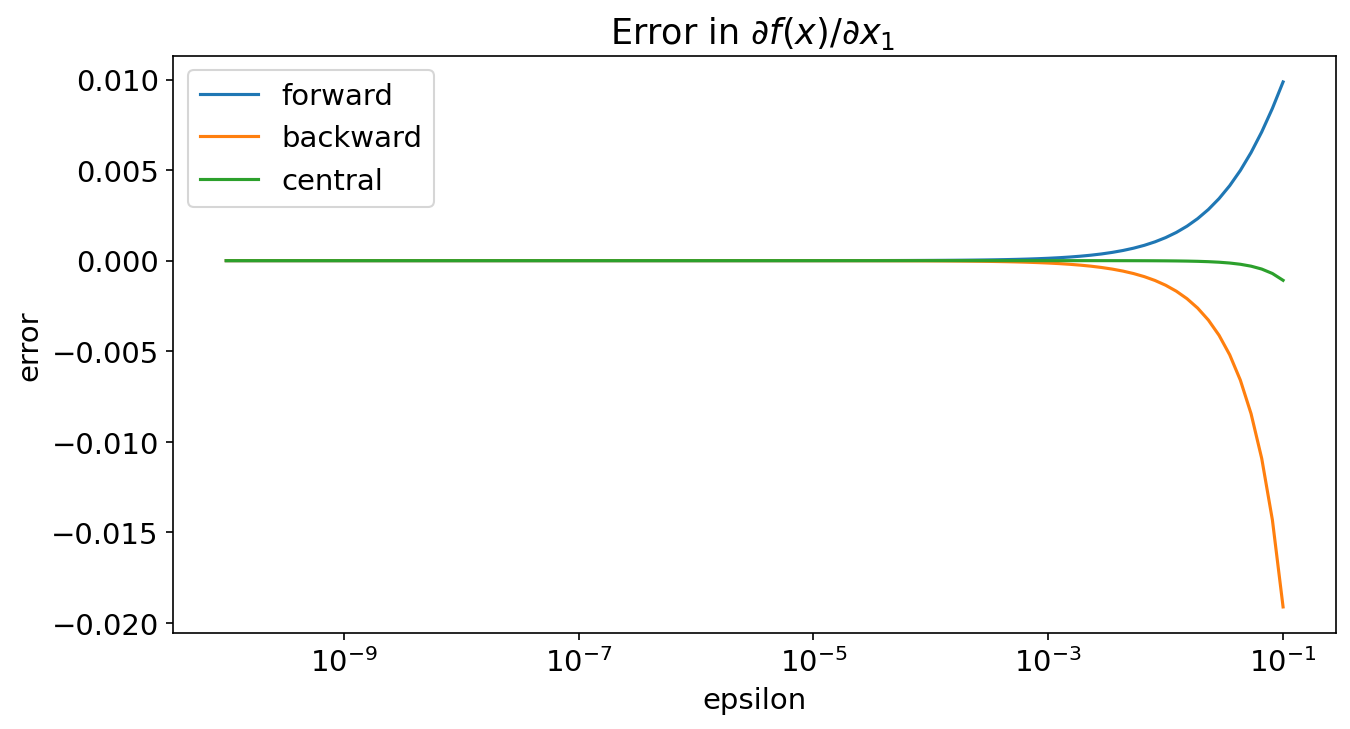

In [13]:
fig = plot_error(epsilon_values=epsilon_values, partial="x_1", forward=forward_err, backward=backward_err, central=central_err)
fig.savefig("figures/3_Problem-2_error_in_grad(x1).png", dpi=300)

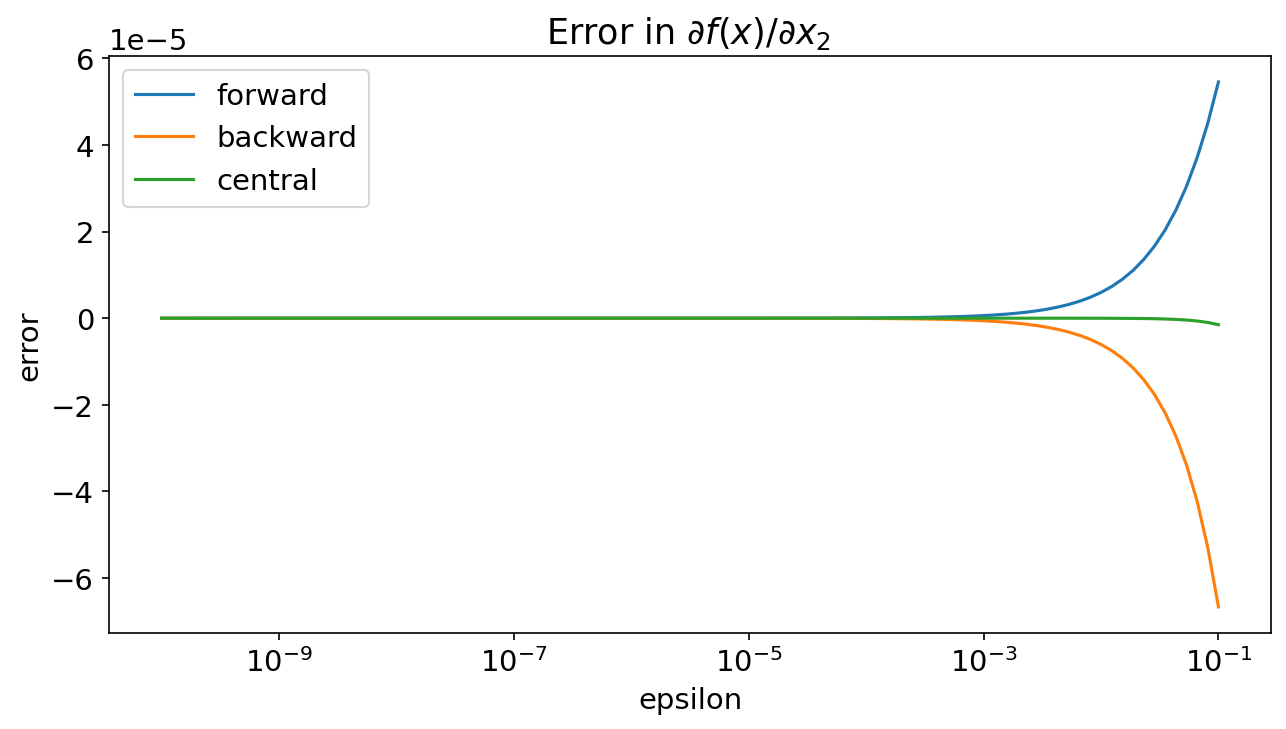

In [14]:
fig  = plot_error(epsilon_values=epsilon_values, partial="x_2", forward=forward_err, backward=backward_err, central=central_err)
fig.savefig("figures/4_Problem-2_error_in_grad(x2).png", dpi=300)

***
***

### Conclusion

- Here we have seen that in increasing epsilon the error in the gradient decreases. This is because the error is proportional to $\epsilon$ and the error is the difference between the analytical gradient and the gradient calculated using the different approximation methods. The error is the difference between the two gradients and the difference is proportional to $\epsilon$.

- But after a certain point error start increasing or answer reaches to zero this is because when we divide in different approximation method by $\epsilon$ we get a very very small number and to store the number upto that precision we need more memory np.float64 is not enough to store that number. So we get a zero.

In [15]:
correct_grad = np.array([-0.0342, 0.0026 ])


epsilon_values = np.logspace(-16, -1, 100)
forward_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="forward_diff",func=prob2)
backward_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="backward_diff",func=prob2)
central_err = error(x0, epsilon_values=epsilon_values, correct_grad=correct_grad, method="central_diff",func=prob2)

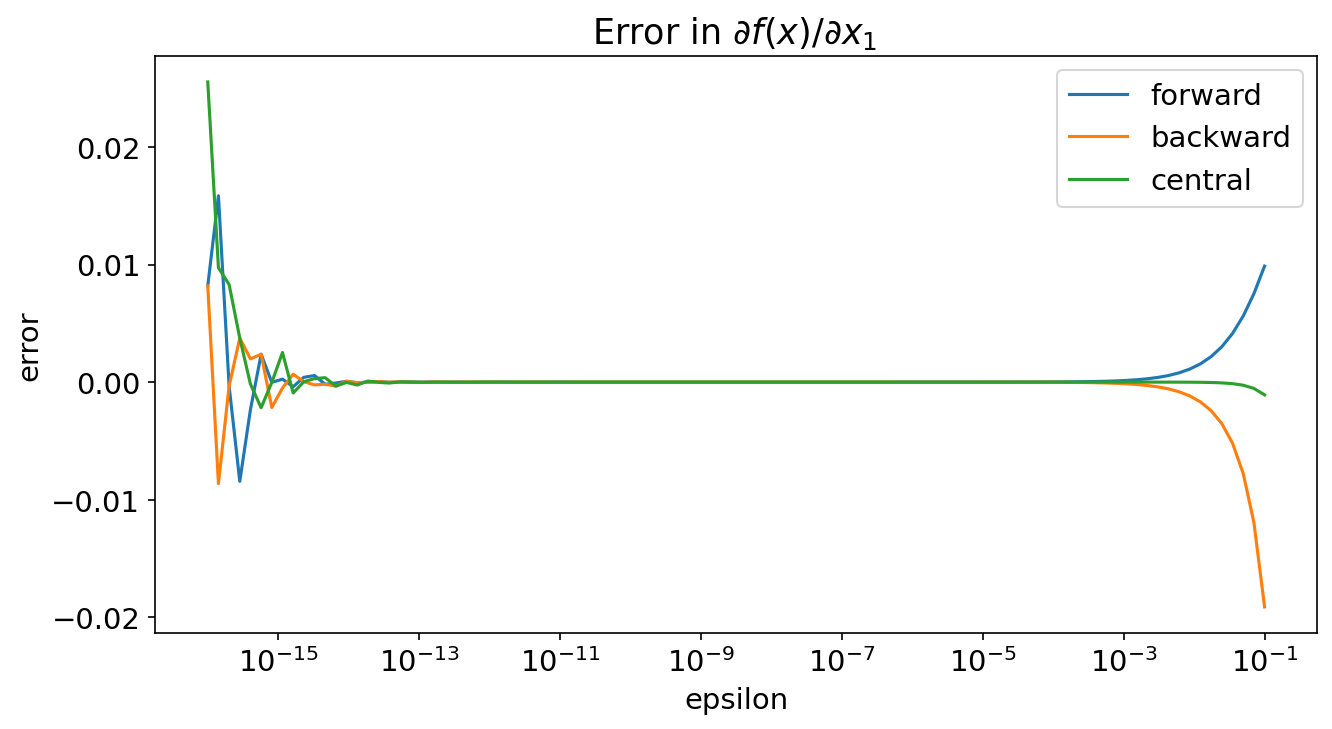

In [16]:
fig  = plot_error(epsilon_values=epsilon_values, partial="x_1", forward=forward_err, backward=backward_err, central=central_err)
fig.savefig("figures/5_For_very_very_less_epsilon.png", dpi=300)

- noise at very very small values of epsilon is due to the fact that we are dividing by a very small number and the computer is not able to store that number upto that precision.